In [135]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [136]:
tf.test.is_gpu_available()

True

In [137]:
df=pd.read_csv('stylometry.csv')
df.head()

,text,author
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed


In [138]:
df['author'].value_counts()

Shomoresh Mojumdar     100
MD Jafor Iqbal         100
Humayun Ahmed          100
Robindronath Tagore    100
Shorot Chandro         100
Name: author, dtype: int64

In [139]:
import re
df['prep']=df.text.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])
df['clean_text']=df['prep'].apply(lambda x: " ".join(x))

In [140]:
df.head()

,text,author,prep,clean_text
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed,"[কারওয়ান, বাজার, এলাকার, মাদক, ব্যবসা, নিয়ন্...",কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed,"[গুলশান, এলাকার, একটা, ফ্যাট, সে, ভাড়া, করে, ...",গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে এই ফ্ল্য...
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed,"[আমাকে, শোভা, ডাকতে, পারে, না, আমাকে, ডাকে, শো...",আমাকে শোভা ডাকতে পারে না আমাকে ডাকে শো শো শো আ...
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed,"[রান্না, ভালো, হয়, নি, শোভা, আপুর, রান্নার, হ...",রান্না ভালো হয় নি শোভা আপুর রান্নার হাত জঘন্য...
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed,"[অবশ্যই, দুপুরে, তুমি, খাবে, ছোট্ট, একটা, কাজ,...",অবশ্যই দুপুরে তুমি খাবে ছোট্ট একটা কাজ করতে পা...


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['clean_text'],df['author'],test_size=0.1,random_state=50,stratify=df['author'])

In [142]:
y_train.value_counts()

Shomoresh Mojumdar     90
MD Jafor Iqbal         90
Humayun Ahmed          90
Robindronath Tagore    90
Shorot Chandro         90
Name: author, dtype: int64

In [143]:
y_test.value_counts()

MD Jafor Iqbal         10
Humayun Ahmed          10
Robindronath Tagore    10
Shorot Chandro         10
Shomoresh Mojumdar     10
Name: author, dtype: int64

In [144]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
y_train=L.fit_transform(y_train)
y_test=L.transform(y_test)

In [145]:
vocab_size=10000
max_length=200

In [146]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OVV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [147]:
print(word_index)

{'<OVV>': 1, 'না': 2, 'আমি': 3, 'করে': 4, 'আমার': 5, 'সে': 6, 'তার': 7, 'একটা': 8, 'আর': 9, 'কিন্তু': 10, 'কী': 11, 'যে': 12, 'কথা': 13, 'হয়': 14, 'কি': 15, 'হয়ে': 16, 'এই': 17, 'আছে': 18, 'তুমি': 19, 'বলল': 20, 'থেকে': 21, 'মনে': 22, 'কিছু': 23, 'তো': 24, 'খুব': 25, 'নিয়ে': 26, 'তোমার': 27, 'হবে': 28, 'গেল': 29, 'দিয়ে': 30, 'নেই': 31, 'সঙ্গে': 32, 'আমাকে': 33, 'বললেন': 34, 'ছিল': 35, 'কেন': 36, 'করতে': 37, 'কহিল': 38, 'তখন': 39, 'নীলু': 40, 'হল': 41, 'ভাল': 42, 'তা': 43, 'করিয়া': 44, 'দেবদাস': 45, 'বাবা': 46, 'মা': 47, 'যায়': 48, 'বলে': 49, 'আমরা': 50, 'ঠিক': 51, 'সব': 52, 'সেই': 53, 'তাঁর': 54, 'কাছে': 55, 'বড়': 56, 'আমাদের': 57, 'তিনি': 58, 'এক': 59, 'কোনো': 60, 'একটু': 61, 'তাই': 62, 'এখন': 63, 'এমন': 64, 'নয়': 65, 'দিকে': 66, 'আবার': 67, 'এবং': 68, 'সময়': 69, 'পর': 70, 'যখন': 71, 'সেটা': 72, 'যেন': 73, 'নাম': 74, 'মুখ': 75, 'যদি': 76, 'যাবে': 77, 'নাই': 78, 'আপনি': 79, 'এসে': 80, 'হয়েছে': 81, 'মাথা': 82, 'হাত': 83, 'জন্যে': 84, 'চলে': 85, 'কেউ': 86, 'বসে': 87, 'মতো': 88,

In [148]:
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)

In [149]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train=pad_sequences(train_sequence,maxlen=max_length,truncating='post')
padded_test=pad_sequences(test_sequence,maxlen=max_length,truncating='post')

In [150]:
padded_test[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   17, 3131,   58, 1167, 4723, 9245,   37,
        321,  952,    2,  825,    1, 3093,  726, 4684,    4,  168,    2,
          4,    1, 4262,  444,   86,   86,    1,  747,    1, 9524, 2266,
         17,    1, 1258,   18,   10,   86,   33,   30,  280, 4684,  902,
        375,  103,   49,    1,    4,   92,  167,   86,  403, 9245,  241,
         49,    6,    1, 1081, 2536,   22,  597,  4

In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def results(model):
    pred=model.predict(padded_test)
    pred=pred.argmax(axis=1)
    ac=accuracy_score(y_test,pred)
    
    
    t=list(L.inverse_transform([0,1,2,3,4]))
    cr=classification_report(y_test,pred,target_names=t)
    cm=confusion_matrix(y_test,pred)
    

    print(model)
    print('----------------------------------------------')
    print("Test Accuracy: ", ac)
    print('----------------------------------------------')
    print('classification report:\n ', cr)
    print('----------------------------------------------')
    
    p = pd.DataFrame(cm, index=list(L.inverse_transform([0, 1, 2, 3,4])), columns=list(L.inverse_transform([0, 1, 2, 3,4])))
    plt.figure(figsize=(8,6))
    sns.heatmap(p,annot=True)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual",  fontsize=14)

In [199]:
#DNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(padded_train, y_train, epochs=100 ,validation_split=0.10 )

Train on 405 samples, validate on 45 samples
Epoch 1/100
405/405 [==============================] - 1s 2ms/sample - loss: 1.6096 - accuracy: 0.2074 - val_loss: 1.6110 - val_accuracy: 0.1333
Epoch 2/100
405/405 [==============================] - 0s 239us/sample - loss: 1.6033 - accuracy: 0.2593 - val_loss: 1.6067 - val_accuracy: 0.1778
Epoch 3/100
405/405 [==============================] - 0s 254us/sample - loss: 1.5961 - accuracy: 0.3037 - val_loss: 1.6038 - val_accuracy: 0.1333
Epoch 4/100
405/405 [==============================] - 0s 229us/sample - loss: 1.5905 - accuracy: 0.3086 - val_loss: 1.5938 - val_accuracy: 0.2000
Epoch 5/100
405/405 [==============================] - 0s 236us/sample - loss: 1.5755 - accuracy: 0.3901 - val_loss: 1.5777 - val_accuracy: 0.3778
Epoch 6/100
405/405 [==============================] - 0s 256us/sample - loss: 1.5591 - accuracy: 0.4370 - val_loss: 1.5521 - val_accuracy: 0.7111
Epoch 7/100
405/405 [==============================] - 0s 219us/sample - lo

405/405 [==============================] - 0s 293us/sample - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9778
Epoch 57/100
405/405 [==============================] - 0s 271us/sample - loss: 0.0590 - accuracy: 0.9877 - val_loss: 0.0889 - val_accuracy: 0.9778
Epoch 58/100
405/405 [==============================] - 0s 217us/sample - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.1002 - val_accuracy: 0.9778
Epoch 59/100
405/405 [==============================] - 0s 219us/sample - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.1000 - val_accuracy: 0.9778
Epoch 60/100
405/405 [==============================] - 0s 209us/sample - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9778
Epoch 61/100
405/405 [==============================] - 0s 239us/sample - loss: 0.0521 - accuracy: 0.9877 - val_loss: 0.0874 - val_accuracy: 0.9778
Epoch 62/100
405/405 [==============================] - 0s 261us/sample - loss: 0.0422 - accuracy: 0.9951 - val_loss: 0.0825 

Text(0.5, 1.0, 'Training and Validation Accuracy Score')

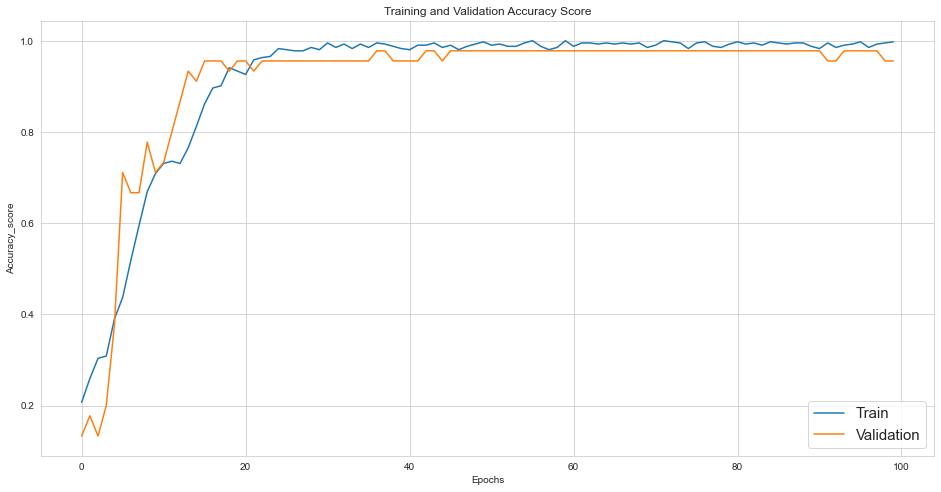

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Train', 'Validation'], fontsize=15 ,loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_score")
plt.title('Training and Validation Accuracy Score')

----------------------------------------------
Test Accuracy:  0.94
----------------------------------------------
classification report:
                       precision    recall  f1-score   support

      Humayun Ahmed       0.89      0.80      0.84        10
     MD Jafor Iqbal       0.91      1.00      0.95        10
Robindronath Tagore       1.00      1.00      1.00        10
 Shomoresh Mojumdar       0.90      0.90      0.90        10
     Shorot Chandro       1.00      1.00      1.00        10

           accuracy                           0.94        50
          macro avg       0.94      0.94      0.94        50
       weighted avg       0.94      0.94      0.94        50

----------------------------------------------


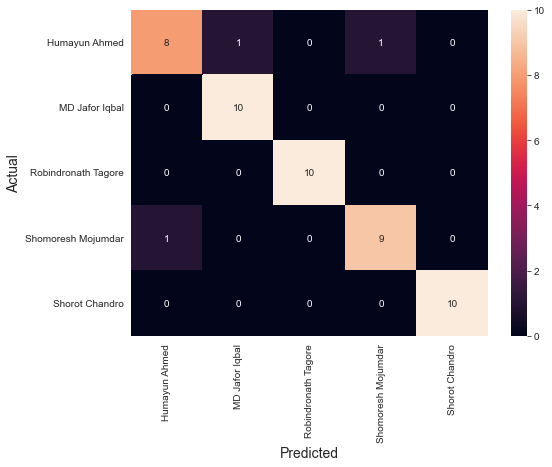

In [201]:
results(model)

In [203]:
#model.save('stylometry.h5')

In [206]:
new_text=["বাবা ফিরলেন রাত এগারোটায়। আমরা জেগে বসে আছি। অনেক লোকজন এসেছে। কেউ যাচ্ছে না। সবাই গম্ভীর মুখে বসে আছেন বসবার ঘরে। বাবা ঘরে ঢুকে এমন ভাব করলেন যেন কিছুই হয়নি। হাসিমুখে বললেন, ‘রেণু ঝগড়া করে সকালের ট্রেনে দিনাজপুর তার বাবার বাড়ি চলে গেছে। আমি ছিলাম না। ভাগ্যিস প্রণববাবু বুদ্ধি করে সঙ্গে গেছেন। নয় তো একা একা মেয়েছেলে এতদূর যাবে, দেখেন না অবস্থাটা, এই মেয়েজাতটার মতো রাগ আর কারোর নেই। হা-হা-হা। এদের নিয়েও চলে না, না নিয়েও চলে না।"]
                    

In [208]:
new_text_seq= tokenizer.texts_to_sequences(new_text)
new_pad=pad_sequences(new_text_seq,maxlen=max_length,truncating='post')

In [213]:
p=model.predict(new_pad)
p=p.argmax(axis=1)
L.inverse_transform(p)

array(['Humayun Ahmed'], dtype=object)